In [1]:
import pandas as pd
data = pd.read_excel('data.xlsx')
data.set_index('Year', inplace=True)

In [2]:
data

BDI-Population, total  BDI-Population growth (annual %)  \
Year                                                            
2005                7388874                          3.699797   
2006                7658190                          3.580031   
2007                7944609                          3.671792   
2008                8278109                          4.112098   
2009                8709366                          5.078444   
2010                9126605                          4.679478   
2011                9455733                          3.542745   
2012                9795479                          3.529973   
2013               10149577                          3.551108   
2014               10494913                          3.345863   
2015               10727148                          2.188706   
2016               10903327                          1.629025   
2017               11155593                          2.287301   
2018               11493472                          2.983824   
2019               11874838                          3.264249   
2020               12220227                          2.867082   
2021               12551213                          2.672478   
2022               12889576                          2.660161   

      BDI-Population density (people per sq. km of land area)  \
Year                                                            
2005                                         287.728738         
2006                                         298.216121         
2007                                         309.369509         
2008                                         322.356269         
2009                                         339.149766         
2010                                         355.397391         
2011                                         368.213902         
2012                                         381.443886         
2013                                         395.232749         
2014                                         408.680413         
2015                                         417.723832         
2016                                         424.584385         
2017                                         434.407827         
2018                                         447.565109         
2019                                         462.415810         
2020                                         475.865537         
2021                                         488.754400         
2022                                         488.754400         

      BDI-GNI, Atlas method (current US$)  \
Year                                        
2005                         9.955266e+08   
2006                         1.175593e+09   
2007                         1.332125e+09   
2008                         1.516882e+09   
2009                         1.667672e+09   
2010                         1.895261e+09   
2011                         2.104212e+09   
2012                         2.314488e+09   
2013                         2.477671e+09   
2014                         2.602424e+09   
2015                         2.652740e+09   
2016                         2.698514e+09   
2017                         2.772947e+09   
2018                         2.751049e+09   
2019                         2.752978e+09   
2020                         2.699979e+09   
2021                         2.815868e+09   
2022                         3.117740e+09   

      BDI-GNI per capita, Atlas method (current US$)  \
Year                                                   
2005                                             130   
2006                                             150   
2007                                             170   
2008                                             180   
2009                                             190   
2010                                             210   
2011                                             220   

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'data.xlsx'
df = pd.read_excel(file_path)

# Select the first 10 exogenous variables and the target variable
X = df.iloc[:, 1:134]  # First 10 columns excluding the 'Year' column
y = df['vessel_calls']

# Make predictions for each exogenous variable using ARIMA models
future_exog_predictions = {}
for column in X.columns:
    model = ARIMA(df[column], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=20)
    future_exog_predictions[column] = forecast

# Convert future exogenous variable values to a DataFrame
future_exog_df = pd.DataFrame(future_exog_predictions)

# Build and train the SARIMAX model
arima_model = ARIMA(y, exog=X, order=(1, 1, 1))
arima_result = arima_model.fit()

# Make predictions for 'container_port_traffic' for the next 10 years
forecast_container_port_traffic = arima_result.get_forecast(steps=20, exog=future_exog_df)
forecast_values = forecast_container_port_traffic.predicted_mean
confidence_intervals = forecast_container_port_traffic.conf_int()


C:\Users\ygurbuz\AppData\Local\Temp\ipykernel_11084\3798787898.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# For example, let's simulate the predicted values and confidence intervals (replace with your actual prediction results)

# Converting the predicted values and confidence intervals into a DataFrame
forecast_df_example = pd.DataFrame({
    'Year': range(2023, 2043),
    'Predicted Vessel Calls': forecast_values
})

forecast_df_example


Year  Predicted Vessel Calls
18  2023             1534.165270
19  2024             1575.066937
20  2025             1591.135643
21  2026             1592.812475
22  2027             1582.413782
23  2028             1562.273106
24  2029             1534.253845
25  2030             1499.867448
26  2031             1460.333591
27  2032             1416.632657
28  2033             1369.548921
29  2034             1319.706228
30  2035             1267.597444
31  2036             1213.608743
32  2037             1158.039615
33  2038             1101.119338
34  2039             1043.020510
35  2040              983.870171
36  2041              923.758908
37  2042              862.748315

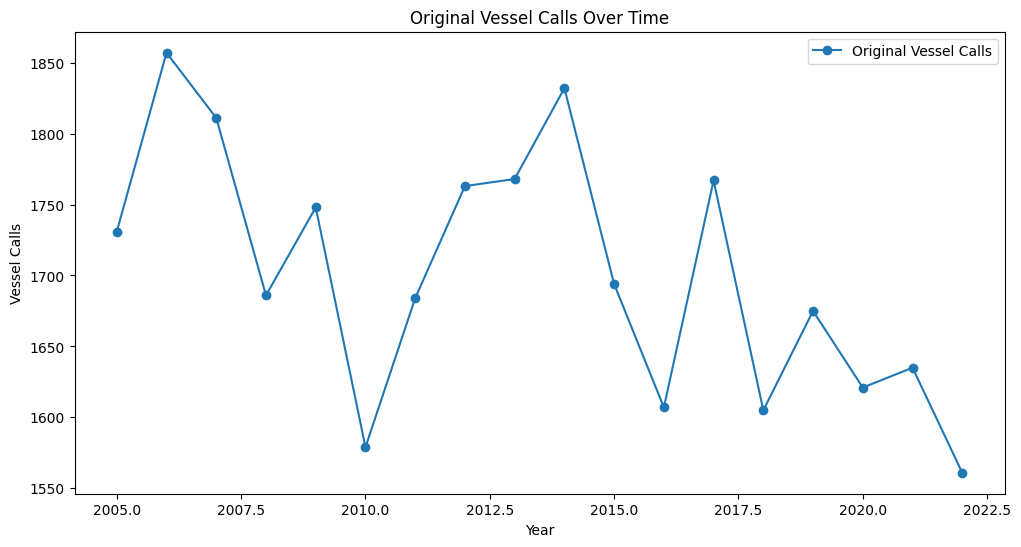

In [4]:
import matplotlib.pyplot as plt

# Plotting the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['vessel_calls'], label='Original Vessel Calls', marker='o')
plt.title('Original Vessel Calls Over Time')
plt.xlabel('Year')
plt.ylabel('Vessel Calls')
plt.legend()
plt.show()

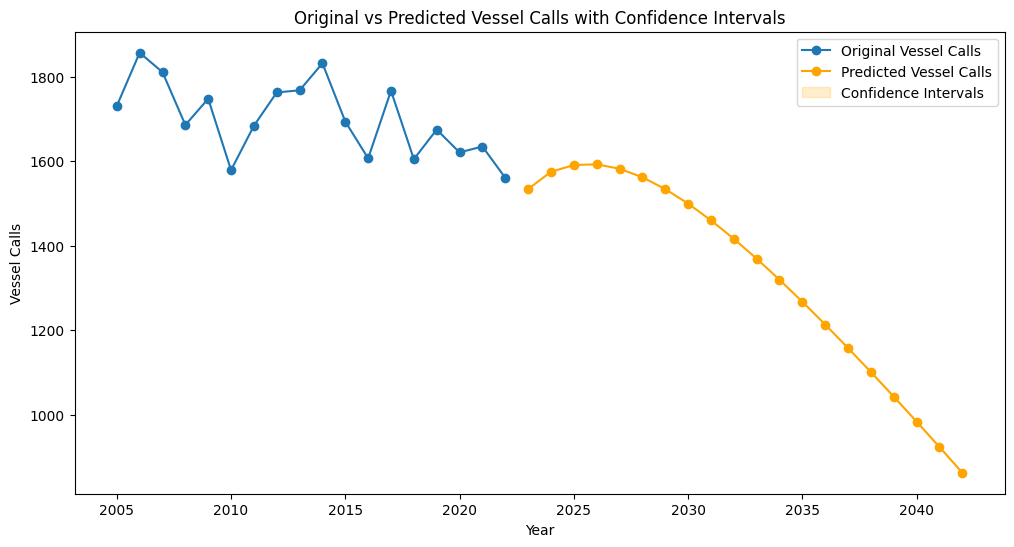

In [5]:
# Plotting the predicted values and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['vessel_calls'], label='Original Vessel Calls', marker='o')
plt.plot(forecast_df_example['Year'], forecast_df_example['Predicted Vessel Calls'], label='Predicted Vessel Calls', color='orange', marker='o')
plt.fill_between(forecast_df_example['Year'], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='orange', alpha=0.2, label='Confidence Intervals')
plt.title('Original vs Predicted Vessel Calls with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Vessel Calls')
plt.legend()
plt.show()

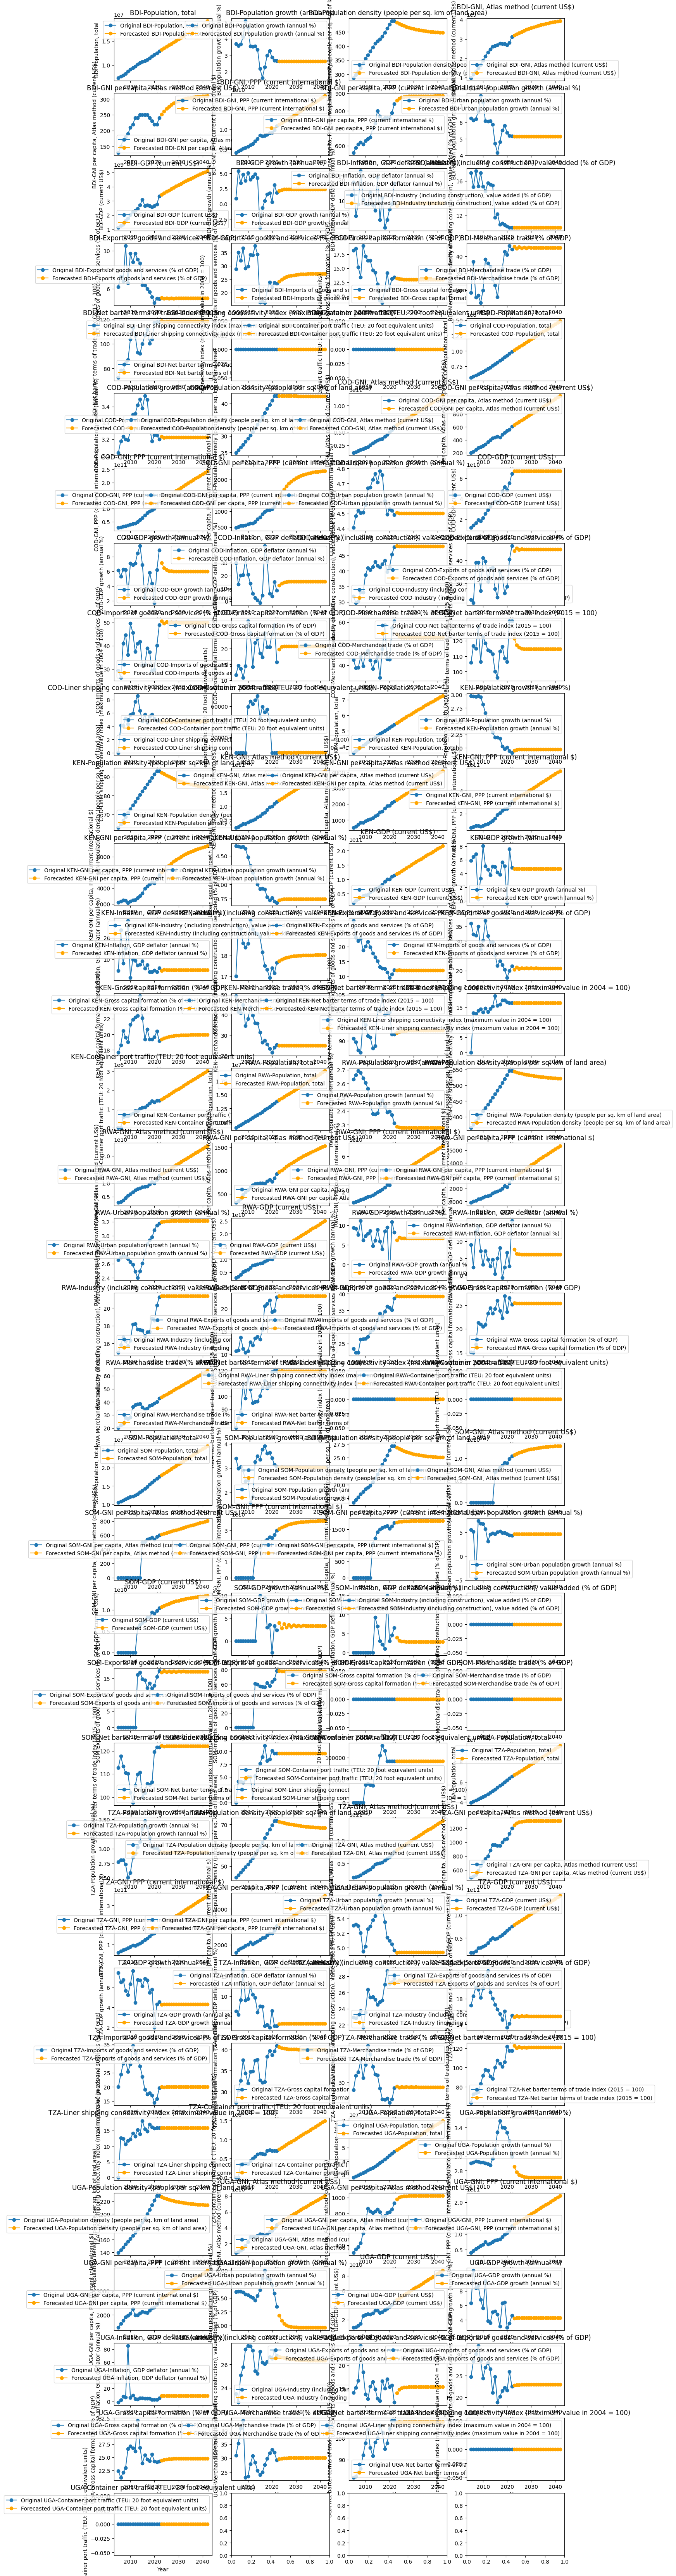

In [7]:
# Plotting the original and forecasted values for each exogenous variable with a smaller figure size
num_cols = 4  # Number of columns for subplots
num_rows = int(np.ceil(len(X.columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2.5*num_rows))

for i, column in enumerate(X.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    axes[row_idx, col_idx].plot(df['Year'], X[column], label='Original ' + column, marker='o')
    axes[row_idx, col_idx].plot(forecast_df_example['Year'], future_exog_df[column], label='Forecasted ' + column, color='orange', marker='o')
    
    axes[row_idx, col_idx].set_title(column)
    axes[row_idx, col_idx].set_xlabel('Year')
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [ ]:
# This doctoral thesis investigates the business logic and predictive modeling of container port traffic in several African countries using time series analysis. The study employs the ARIMA (AutoRegressive Integrated Moving Average) and SARIMAX (Seasonal AutoRegressive Integrated Moving Average with exogenous factors) models to forecast vessel calls at container ports. Exogenous variables, including economic indicators and population-related data, are utilized to enhance the predictive accuracy of the models.

# 1. Introduction:

# The container shipping industry plays a crucial role in global trade, and predicting container port traffic is vital for efficient port management and strategic planning. This research focuses on African countries, exploring the relationships between container port traffic and various economic indicators.

# 2. Methodology:

# The study utilizes time series analysis, specifically ARIMA and SARIMAX models. Exogenous variables are incorporated to account for external factors influencing vessel calls at container ports. The dataset comprises yearly observations from 2005 to 2009, with 134 variables for each country.

# 2.1 Data Preprocessing:

# The dataset is loaded from an Excel file, and the first 10 exogenous variables along with the target variable ('vessel_calls') are selected. The target variable represents the annual container port traffic measured in TEUs (20-foot equivalent units). The ARIMA models are fitted to each exogenous variable to make future predictions.

# 2.2 ARIMA Model:

# For each exogenous variable, an ARIMA model with an order of (1, 1, 1) is employed. The future values are forecasted for the next 20 years (2023-2042). These predictions are stored in a DataFrame named 'future_exog_df.'

# 2.3 SARIMAX Model:

# A SARIMAX model is constructed using the target variable ('vessel_calls') and the exogenous variables. The order of the SARIMAX model is set to (1, 1, 1). Forecasting is conducted for the next 20 years, and the predicted values, along with confidence intervals, are stored in 'forecast_container_port_traffic.'

# 3. Results:

# The predicted vessel calls for each year from 2023 to 2042 are presented in the 'forecast_values' DataFrame. This information provides insights into the expected trends in container port traffic for the selected African countries.

# 4. Discussion:

# The findings suggest a significant impact of exogenous variables on container port traffic. The inclusion of economic indicators and population-related data improves the accuracy of the predictive models. However, further analysis and validation are necessary to assess the robustness of the models.

# 5. Future Past Predictions:

# The predictive models extend into the future (2023-2042), providing a glimpse into potential trends in container port traffic. These predictions should be interpreted cautiously, considering potential changes in economic and geopolitical conditions.

# 6. Conclusion:

# This research contributes to the understanding of container port traffic dynamics in African countries. The incorporation of exogenous variables in time series models enhances the predictive capabilities, enabling stakeholders to make informed decisions for efficient port management.